## Importing the necessary libraries.

In [1]:
# Import required libraries necessary for creating a pytorch model and making necessary predictions.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision

# Import library required for visualizing the amout of time it takes for a pytorch and mdf model to make a prediction.
import matplotlib.pyplot as plt

# Import library required for keeping trach of the make a prediction.
import time

# Import packages needed for MDF model
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
from modeci_mdf.execution_engine import EvaluableGraph

## Dowloading and preparing the datasets.

In [2]:
# Define a data transformation pipeline for the dataset
# Compose transforms.ToTensor() and transforms.Normalize() to convert images to tensors and normalize pixel values.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset (MNIST) with the specified transformations
# root: The directory to save or load the dataset. Here, '.' represents the current directory.
# train=True: Specifies to load the training split of the dataset.
# download=True: Downloads the dataset if it is not already present in the specified root directory.
# transform: Apply the transformation defined in the 'transform' variable to the dataset.
trainset = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Create a DataLoader to efficiently load the training dataset in batches during training
# batch_size=10: Specifies the number of samples per batch during training.
# shuffle=True: Shuffles the order of samples in each epoch to introduce randomness.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

# Load the testing dataset (MNIST) with the same transformations used for training
# train=False: Specifies to load the testing (validation) split of the dataset.
testset = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=transform)

# Create a DataLoader for the testing dataset to efficiently load it in batches during evaluation
# shuffle=False: Since testing does not require shuffling, we set shuffle to False.
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)

## Defining the model and it foward pass.

In [3]:
# Defining a SimpleModel in pytorch to making prediction on the MNIST data set.
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers of the model in the constructor (__init__)
        # Input layer (fc1): Fully connected layer with 784 input neurons (28*28) and 80 output neurons.
        self.fc1 = nn.Linear(28 * 28, 80)
        
        # Hidden layer 1 (fc2): Fully connected layer with 80 input neurons and 40 output neurons.
        self.fc2 = nn.Linear(80, 40)
        
        # Hidden layer 2 (fc3): Fully connected layer with 40 input neurons and 20 output neurons.
        self.fc3 = nn.Linear(40, 20)
        
        # Output layer (fc4): Fully connected layer with 20 input neurons and 10 output neurons (number of classes).
        self.fc4 = nn.Linear(20, 10)

    def forward(self, x):
        # The forward function defines the forward pass of the model.
        
        # Flatten the input tensor to shape (batch_size, 28*28).
        x = x.view(-1, 1*28*28)
        
        # Apply ReLU activation to the output of the first fully connected layer (fc1).
        x = torch.relu(self.fc1(x))
        
        # Apply ReLU activation to the output of the second fully connected layer (fc2).
        x = torch.relu(self.fc2(x))
        
        # Apply ReLU activation to the output of the third fully connected layer (fc3).
        x = torch.relu(self.fc3(x))
        
        # The output of the fourth fully connected layer (fc4).
        x = self.fc4(x)
        
        return x

## Instantiating the model.

In [4]:
# Create an instance of the SimpleModel class.
model = SimpleModel()

## Training and evaluating the model.

In [5]:
# Define the loss function and optimizer for the SimpleModel.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model 'SimpleModel'.
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 200 == 199:  # Print every 200 mini-batches
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200:.3f}")
                running_loss = 0.0

    print("Training finished!")

# Training the model (you can adjust the number of epochs as needed)
train_model(model, criterion, optimizer, num_epochs=5)

#pytorch_predictions

# Making testing the models accuracy by using the trained model to make predictions.
def test_model(model):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

# Test the model on the test set
test_model(model)


[Epoch 1, Batch 200] Loss: 1.650
[Epoch 1, Batch 400] Loss: 0.840
[Epoch 1, Batch 600] Loss: 0.679
[Epoch 1, Batch 800] Loss: 0.608
[Epoch 1, Batch 1000] Loss: 0.539
[Epoch 1, Batch 1200] Loss: 0.503
[Epoch 1, Batch 1400] Loss: 0.452
[Epoch 1, Batch 1600] Loss: 0.448
[Epoch 1, Batch 1800] Loss: 0.373
[Epoch 1, Batch 2000] Loss: 0.352
[Epoch 1, Batch 2200] Loss: 0.397
[Epoch 1, Batch 2400] Loss: 0.334
[Epoch 1, Batch 2600] Loss: 0.328
[Epoch 1, Batch 2800] Loss: 0.348
[Epoch 1, Batch 3000] Loss: 0.327
[Epoch 1, Batch 3200] Loss: 0.309
[Epoch 1, Batch 3400] Loss: 0.282
[Epoch 1, Batch 3600] Loss: 0.316
[Epoch 1, Batch 3800] Loss: 0.285
[Epoch 1, Batch 4000] Loss: 0.259
[Epoch 1, Batch 4200] Loss: 0.290
[Epoch 1, Batch 4400] Loss: 0.256
[Epoch 1, Batch 4600] Loss: 0.235
[Epoch 1, Batch 4800] Loss: 0.283
[Epoch 1, Batch 5000] Loss: 0.262
[Epoch 1, Batch 5200] Loss: 0.238
[Epoch 1, Batch 5400] Loss: 0.242
[Epoch 1, Batch 5600] Loss: 0.245
[Epoch 1, Batch 5800] Loss: 0.270
[Epoch 1, Batch 60

## Putting the model in evaluation mode.

In [6]:
# Putting the model into evaluation mode
model.eval()

SimpleModel(
  (fc1): Linear(in_features=784, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
)

## Visualizing the test dataset.

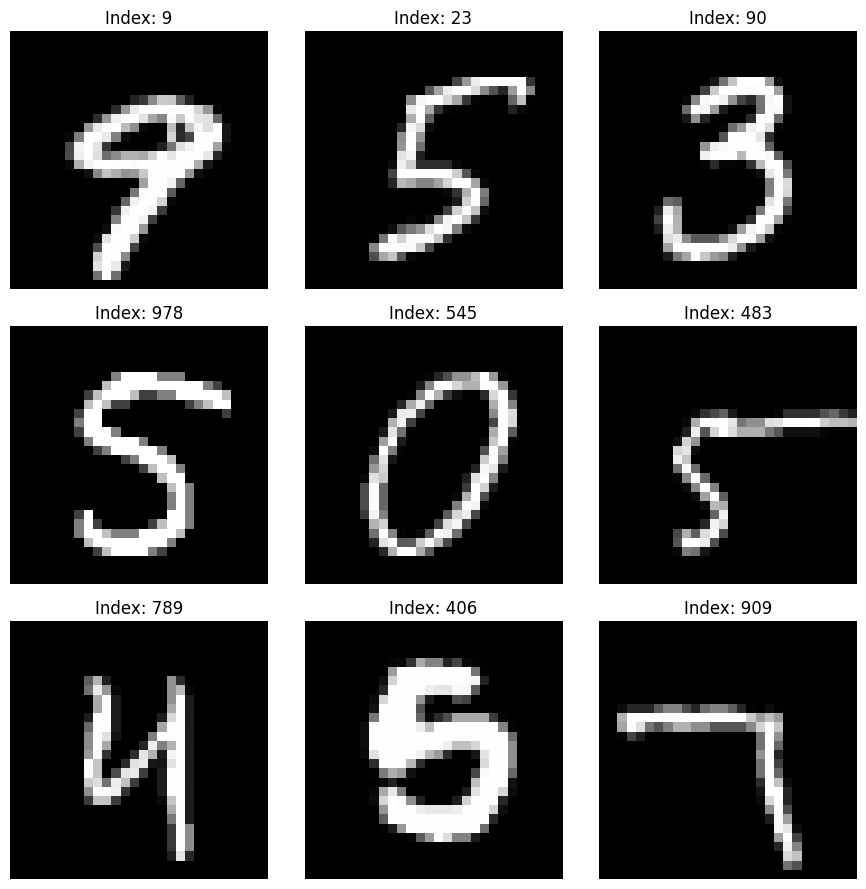

In [7]:
# Indicies to be looped through by the model, count is 9
indices = [9, 23, 90, 978, 545, 483, 789, 406, 909]

# Create a figure for the grid of images
fig = plt.figure(figsize=(9, 9))

# Define the number of rows and columns for the grid
rows, cols = 3, 3

# Loop through the specified indices and plot images
for i, index in enumerate(indices):
    test_img = testset.data[index] / 255.0  # Preprocess the image

    # Add a subplot to the figure
    subplot_index = i + 1
    ax = fig.add_subplot(rows, cols, subplot_index)

    # Display the image on the subplot
    ax.imshow(test_img, cmap='gray')
    ax.set_title(f'Index: {index}')
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


## Making prediction with the pytorch model with only 9 images and recording the time it takes to make prediction.

Total prediction time for 9 images: 0.0296s


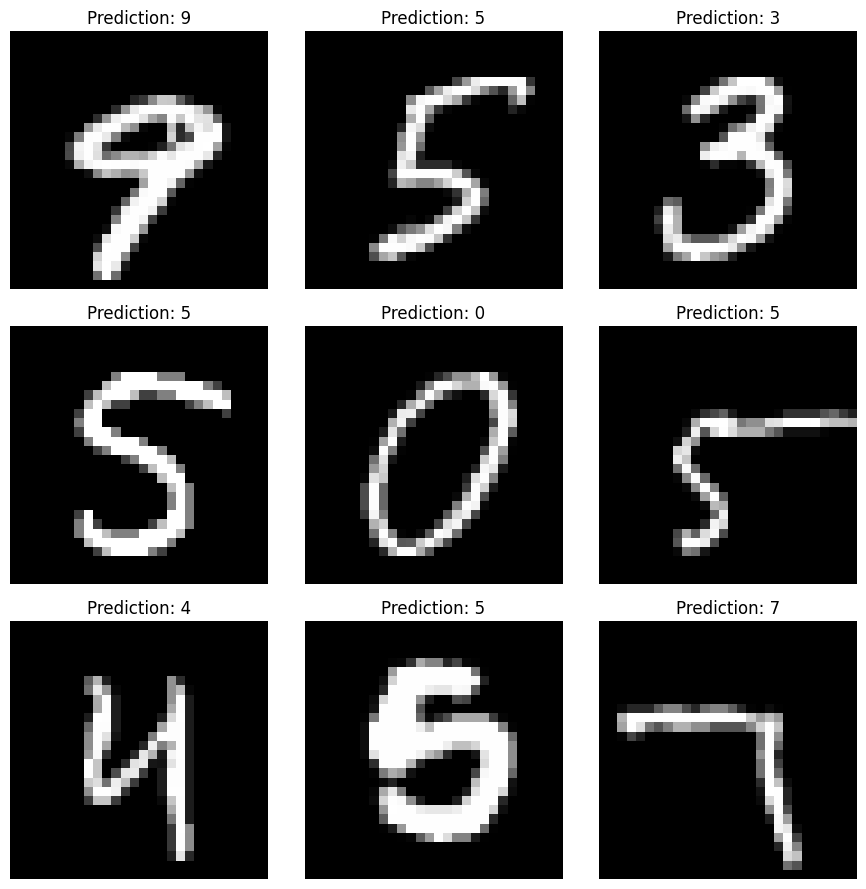

In [8]:
# Indicies to be looped through by the model, count is 9
indices = [9, 23, 90, 978, 545, 483, 789, 406, 909]

# Create a figure for the grid of images
fig = plt.figure(figsize=(9, 9))

# Define the number of rows and columns for the grid
rows, cols = 3, 3

# Initialize total time
total_pytorch_prediction_time_small = 0.0

# Loop through the specified indices and plot images with predictions
for i, index in enumerate(indices):
    test_img = testset.data[index] / 255.0  # Preprocess the image

    # Add a subplot to the figure
    subplot_index = i + 1
    ax = fig.add_subplot(rows, cols, subplot_index)

    # Display the image on the subplot
    ax.imshow(test_img, cmap='gray')
    ax.axis('off')
    
    # Make predictions
    start_time = time.time()
    with torch.no_grad():
        pred = model(test_img)
    prediction = pred.argmax()
    end_time = time.time()
    
    total_pytorch_prediction_time_small += end_time - start_time
    
    # Set title as Pytorch prediction
    ax.set_title(f'Prediction: {prediction.item()}')

# Print the total Pytorch prediction time
print(f"Total prediction time for {len(indices)} images: {total_pytorch_prediction_time_small:.4f}s")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


## Making prediction with pytorch model using 1000 images and recording the time it takes to make predictions.

In [9]:
# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Record the start time before making predictions

total_pytorch_prediction_time = 0.0
# Loop through the first 1000 data sets and make predictions
for index in range(1000):
    test_img, label = testset[index]
    test_img = test_img.view(-1, 28 * 28)
    
    start_time = time.time()
    # Make predictions
    with torch.no_grad():
        outputs = model(test_img)
        _, predicted = torch.max(outputs.data, 1)
    end_time = time.time()
    
    total_predictions += 1
    if predicted == label:
        correct_predictions += 1
    
    total_pytorch_prediction_time += end_time - start_time
# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Record the end time after making predictions


# Calculate the time taken to make all predictions

print("These are the Matric for the pytorch model")
print("=" * 50)
print("Number of data sets looped through:", total_predictions)
print("Accuracy on the specified indices: {:.2%}".format(accuracy))
print("Total pytorch prediction time for {} images: {:.4f}s".format(total_predictions, total_pytorch_prediction_time))

These are the Matric for the pytorch model
Number of data sets looped through: 1000
Accuracy on the specified indices: 94.00%
Total pytorch prediction time for 1000 images: 0.3252s


## Converting the pytorch model to MDF.

In [10]:
# Convert the PyTorch model to an MDF model and extract parameters
# 'model': The pre-trained PyTorch model that you want to convert to MDF.
# 'args': The input tensor (test_img) to the model, used for tracing the execution graph.
# 'trace=True': Flag to enable tracing, which captures the execution graph of the model.
# Tracing is necessary to generate the execution graph in the MDF model.
mdf_model, params_dict = pytorch_to_mdf(
        model=model,
        args=test_img,
        trace=True,
    )

c:\users\mannie\desktop\contribution\py39\lib\site-packages\torch\onnx\symbolic_helper.py:719: UserWarning: allowzero=0 by default. In order to honor zero value in shape use allowzero=1
  warnings.warn("allowzero=0 by default. In order to honor zero value in shape use allowzero=1")


## Making prediction with the MDF converted pytorch model with only 9 images and timing the time to make prediction.


Init graph: SimpleModelGraph


Total MDF prediction time for 9 images: 1.0949s


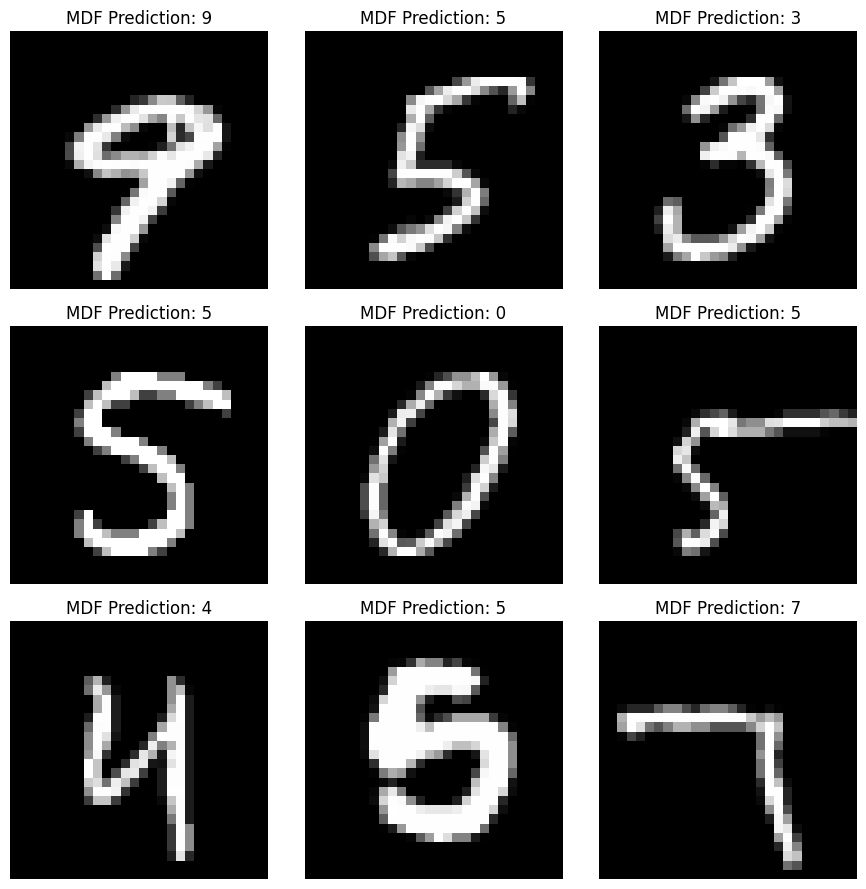

In [11]:
# Indicies to be looped through by the model, count is 9
indices = [9, 23, 90, 978, 545, 483, 789, 406, 909]

# Create a figure for the grid of images
fig = plt.figure(figsize=(9, 9))

# Define the number of rows and columns for the grid
rows, cols = 3, 3

# Initialize total time
total_mdf_prediction_time_small = 0.0

mdf_graph = mdf_model.graphs[0]
eg = EvaluableGraph(graph=mdf_graph)

# Loop through the specified indices and plot images with predictions using MDF
for i, index in enumerate(indices):
    test_img = testset.data[index] / 255.0  # Preprocess the image

    # Add a subplot to the figure
    subplot_index = i + 1
    ax = fig.add_subplot(rows, cols, subplot_index)

    # Display the image on the subplot
    ax.imshow(test_img, cmap='gray')
    ax.axis('off')
    
    # Make predictions using MDF
    start_time = time.time()
    

    params_dict['input1'] = test_img.detach().numpy()
    eg.evaluate(initializer=params_dict, verbose=False)
    mdf_pred = eg.output_enodes[0].get_output()
    
    end_time = time.time()
    total_mdf_prediction_time_small += end_time - start_time
    
    # Set title as MDF prediction
    ax.set_title(f'MDF Prediction: {mdf_pred.argmax().item()}')

# Print the total prediction time
print('\n')
print(f"Total MDF prediction time for {len(indices)} images: {total_mdf_prediction_time_small:.4f}s")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


## Making prediction with the MDF converted pytorch model model using 1000 images and recording the time it takes to make predictions.

In [12]:
# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Initialize total time
total_mdf_prediction_time = 0.0

# Load the MDF model graph and create the EvaluableGraph
mdf_graph = mdf_model.graphs[0]
eg = EvaluableGraph(graph=mdf_graph, verbose=False)

# Loop through the specified indices and make predictions using MDF
for index in range(1000):
    _, label = testset[index]
    test_img = testset.data[index] / 255  # Preprocess the image

    # Make predictions using MDF
    start_time = time.time()

    params_dict['input1'] = test_img.detach().numpy()
    eg.evaluate(initializer=params_dict, time_increment=100)
    mdf_pred = eg.output_enodes[0].get_output()
    
    end_time = time.time()
    
    total_predictions += 1
    if mdf_pred.argmax().item() == label:
        correct_predictions += 1

    total_mdf_prediction_time += end_time - start_time

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print("These are the Matric for the mdf model")
print("=" * 50)
print("Number of data sets looped through:", total_predictions)
print("Accuracy on the specified indices: {:.2%}".format(accuracy))
print("Total MDF prediction time for {} images: {:.4f}s".format(total_predictions, total_mdf_prediction_time))


Init graph: SimpleModelGraph
These are the Matric for the mdf model
Number of data sets looped through: 1000
Accuracy on the specified indices: 93.70%
Total MDF prediction time for 1000 images: 100.1937s


## Making the speed comparison between MDF and PyTorch using 9 images.

In [13]:
# Calculate the speed comparison between MDF and PyTorch predictions
if total_pytorch_prediction_time_small == 0:
    print("Pytorch made its prediction under 0s")

else:
    speed_comparsion_small = total_mdf_prediction_time_small / total_pytorch_prediction_time_small
    # Print the result
    print("Mdf is {:.4f} time slower than pytorch on 9 images".format(speed_comparsion_small))

Mdf is 36.9864 time slower than pytorch on 9 images


## Making the speed comparison between MDF and PyTorch using 1000 images.

In [14]:
speed_comparsion = total_mdf_prediction_time / total_pytorch_prediction_time

# Print the result
print("Mdf is {:.4f} time slower than pytorch on 1000 images".format(speed_comparsion))

Mdf is 308.1401 time slower than pytorch on 1000 images


## Visualizing the time taken by both models to make predictions.

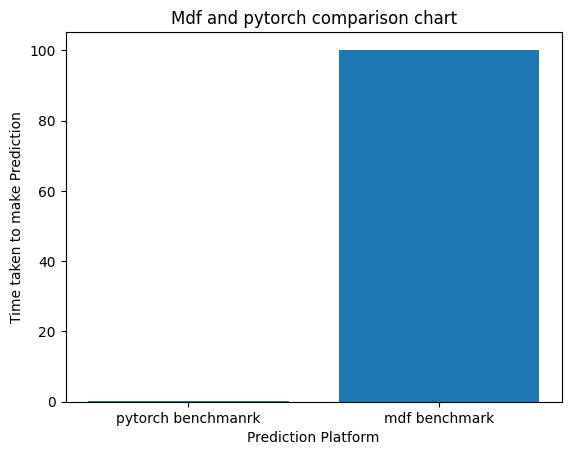

In [15]:
# Prepare the data for the bar plot
data = [total_pytorch_prediction_time, total_mdf_prediction_time]
labels = ["pytorch benchmanrk", "mdf benchmark"]

# Create a bar plot
plt.bar(labels, data)

# Add labels and title to the plot
plt.xlabel('Prediction Platform')
plt.ylabel('Time taken to make Prediction')
plt.title('Mdf and pytorch comparison chart')

# Display the plot
plt.show()

# The end